In [1]:
import math
import random
import numpy as np

def getGradient(data, y, w, eta, delta, lam, num_iter, wt, x):
    gradient = 0
    for j in range(len(x)):
        if (y[j] >= (np.dot(wt, x[j]) + delta)):
            gradient += 2 * (y[j] - np.dot(wt, x[j]) - delta) * -x[j]
        elif (abs(y[j] - np.dot(wt, x[j])) < delta):
            gradent += 0;
        elif (y[j] <= (np.dot(wt, x[j]) - delta)):
            gradient += 2 * (y[j] - np.dot(wt, x[j]) + delta) * -x[j]
        gradient = gradient / len(x)
        gradient += 2 * lam * sum(wt)
        return gradient
    
def getFw(data, y, w, eta, delta, lam, num_iter, wt, x): # Returns f(w)
    fw = 0
    for t in range(len(x)):
        if (y[t] >= (np.dot(wt, x[t]) + delta)):
            fw += ((y[t] - np.dot(wt, x[t]) - delta) ** 2)
        elif (abs(y[t] - np.dot(wt, x[t])) < delta):
            fw += 0
        elif (y[t] <= (np.dot(wt, x[t]) - delta)):
            fw += ((y[t] - np.dot(wt, x[t]) + delta) ** 2)
        fw = fw/len(x)
        fw += lam * sum(wt**2)
    return fw

def bgd_l2(data, y, w, eta, delta, lam, num_iter):
    uno = np.full((100, 1), 1) # Creating a matrix of just ones
    x = np.concatenate((uno, data), axis = 1) # Adding it to the front of the data matrix
    w2 = w
    fwHistory = []
    for i in range(num_iter):                                     
        wt = np.transpose(w2)
        
        # Getting the gradient, using respective derivatives from the piecewise function
        gradient = getGradient(data, y, w, eta, delta, lam, num_iter, wt, x)
        
        w2 = w2 - (eta * gradient)  # How to change w2 according to GD
        wt = np.transpose(w2)
        
        fw = getFw(data, y, w, eta, delta, lam, num_iter, wt, x)
        fwHistory.append(fw)
        
    return w2, fwHistory

def sgd_l2(data, y, w, eta, delta, lam, num_iter, i=-1):
    uno = np.full((100, 1), 1)                # Creating a matrix of just ones
    x = np.concatenate((uno, data), axis = 1) # Adding it to the front of the data matrix
    w2 = w
    fwHistory = []
    
    if (i != -1):
        numer_iter = 1
    else:
        i = random.randrange(0, len(x))
        
    for j in range(1, num_iter + 1):
        wt = np.transpose(w2)
        # Getting the gradient, using respective derivatives from the piecewise function
        gradient = getGradient(data, y, w, eta, delta, lam, num_iter, wt, x)
        
        w2 = w2 - ((eta / math.sqrt(j)) * gradient) # How to change w2 according to SGD
        
        wt = np.transpose(w2)
        fw = getFw(data, y, w, eta, delta, lam, num_iter, wt, x)
        fwHistory.append(fw)
        i = random.randrange(0, len(x))
        
    return w2, fwHistory

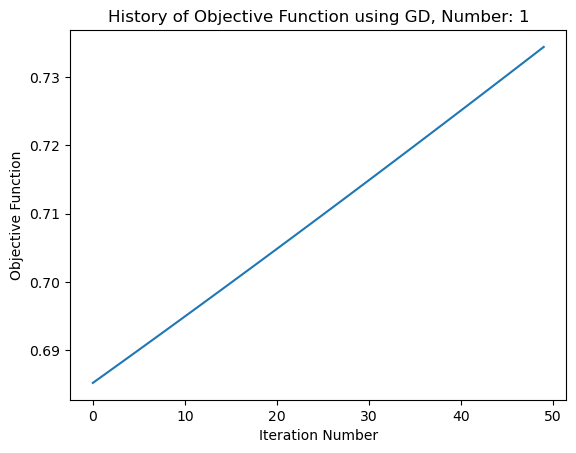

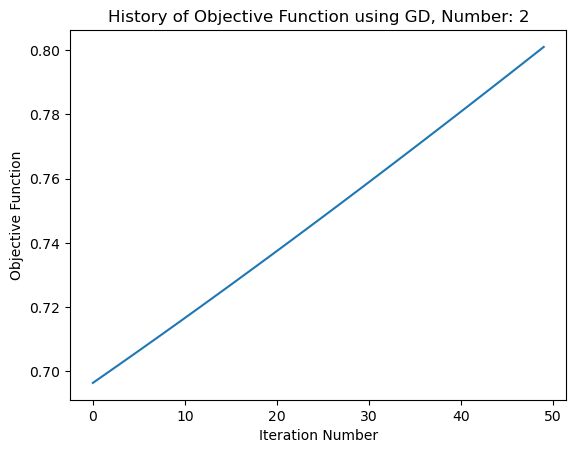

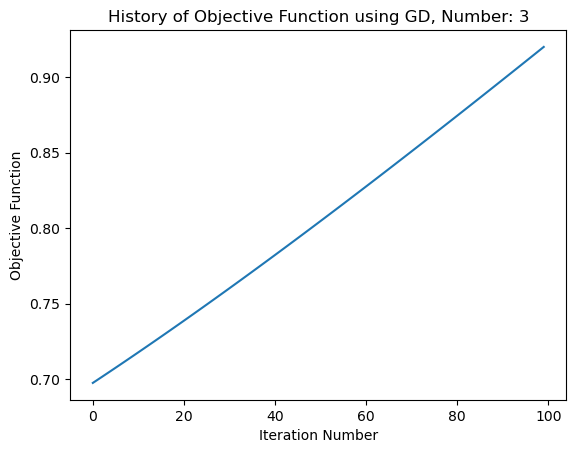

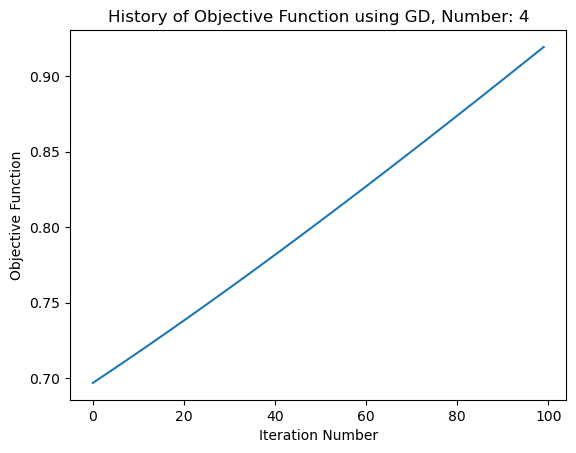

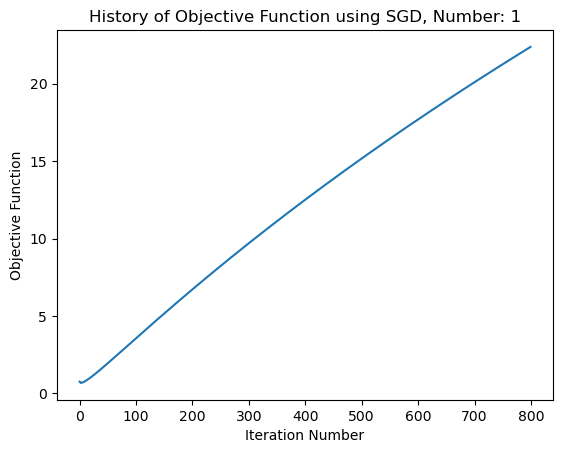

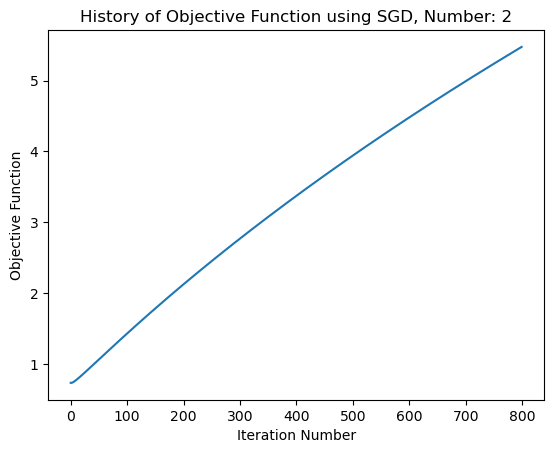

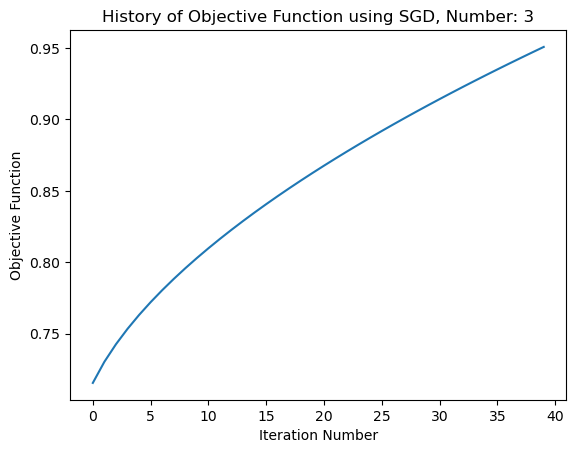

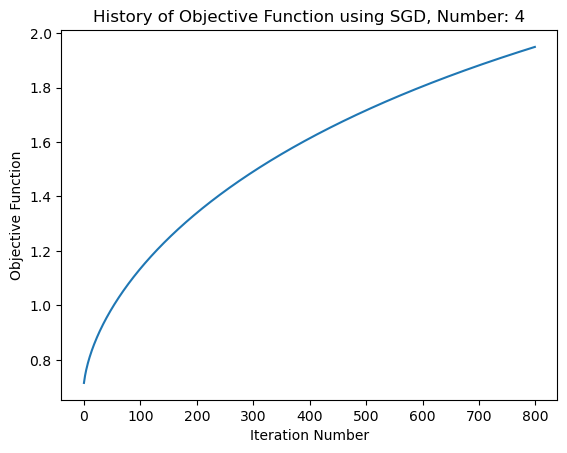

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
from Problem5 import bgd_l2, sgd_l2

if __name__ == '__main__':
    # Put the code for the plots here, you can use different functions for each
    # part

    # Gradient Descent Initialization
    w = np.random.random(2)    # Generate 2 random numbers from 0-2
    data = np.load('data.npy') # Load in data to use
    x = np.hsplit(data, 2)     # Split data through middle
    y = x[1]                   # y is the second half (or outputs)
    x = x[0]                   # x is the first half (or inputs)
    
    def plotGraphGD(data, y, w, eta, delta, lam, num_iter, numTest): 
        w2, fwHistory = bgd_l2(data, y, w, eta, delta, lam, num_iter)
        plt.plot(fwHistory)
        plt.title("History of Objective Function using GD, Number: " + numTest)
        plt.xlabel("Iteration Number")
        plt.ylabel("Objective Function")
        plt.show()
    
    # The GD tests
    plotGraphGD(x, y, w, .05, .1, .001, 50, "1")
    plotGraphGD(x, y, w, .1, .01, .001, 50, "2")
    plotGraphGD(x, y, w, .1, 0, .001, 100, "3")
    plotGraphGD(x, y, w, .1, 0, 0, 100, "4")
 
    def plotGraphSGD(data, y, w, eta, delta, lam, num_iter, numTest):
        w2, fwHistory = sgd_l2(data, y, w, eta, delta, lam, num_iter, i=-1)
        plt.plot(fwHistory)
        plt.title("History of Objective Function using SGD, Number: " + numTest)
        plt.xlabel("Iteration Number")
        plt.ylabel("Objective Function")
        plt.show()

    # The SGD tests
    plotGraphSGD(x, y, w, 1, .1, .5, 800, "1")
    plotGraphSGD(x, y, w, 1, .01, .1, 800, "2")
    plotGraphSGD(x, y, w, 1, 0, 0, 40, "3")
    plotGraphSGD(x, y, w, 1, 0, 0, 800, "4")